In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve,roc_auc_score, f1_score
from sklearn.naive_bayes import GaussianNB

In [ ]:
df=pd.read_csv("/content/titanic.csv")

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.drop(['Name'], axis=1, inplace=True)
df.drop(['Ticket'], axis=1, inplace=True)
df.drop(['Cabin'], axis=1, inplace=True)
df.drop(['PassengerId'], axis=1, inplace=True)

In [ ]:
df = df.dropna()

In [ ]:
label_encoder = LabelEncoder() 
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked']= label_encoder.fit_transform(df['Embarked'])

In [ ]:
y = df['Survived']
x = df.drop(['Survived'],axis=1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1)

# Logistic Regression


In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [ ]:
CMatrix = confusion_matrix(y_test, y_pred)
print(CMatrix)

[[104  22]
 [ 24  64]]


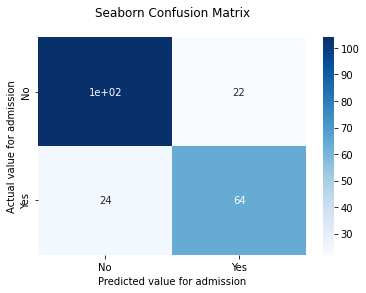

In [ ]:
ax = sns.heatmap(CMatrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix\n')
ax.set_xlabel('Predicted value for admission')
ax.set_ylabel('Actual value for admission')

ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes'])

plt.show()

In [ ]:
Accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model is: ",Accuracy)

Accuracy of the model is:  0.7850467289719626


# Naive Bayes



In [ ]:
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_pred2 = model.predict(x_test)

In [ ]:
df_pred=pd.DataFrame()

In [ ]:
df_pred['y_test']=y_test
df_pred['y_pred']=y_pred2

In [ ]:
print(accuracy_score(y_test,y_pred2))

0.7990654205607477


In [ ]:
CMatrix2 = confusion_matrix(y_test, y_pred2)
print(CMatrix2)

[[104  22]
 [ 21  67]]


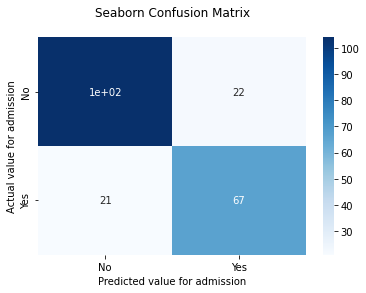

In [ ]:
ax = sns.heatmap(CMatrix2, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix\n')
ax.set_xlabel('Predicted value for admission')
ax.set_ylabel('Actual value for admission')

ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes'])

plt.show()

# AUC

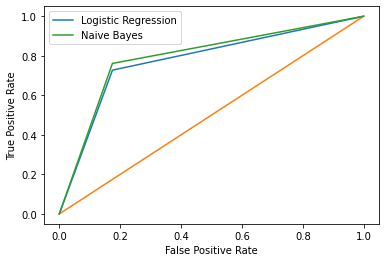

In [ ]:
#Roc curve for logistic model
fpr, tpr, _ = roc_curve(y_test,  y_pred)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs)

#ROC curve for Naive bayes
n_fpr, n_tpr, _ = roc_curve(y_test,  y_pred2)

#AUC score
aucLogistic = roc_auc_score(y_test, y_pred)
aucNoModel= roc_auc_score(y_test, random_probs)

aucNaive = roc_auc_score(y_test, y_pred2)


#create ROC curve
plt.plot(fpr,tpr,label= "Logistic Regression")
plt.plot(p_fpr,p_tpr)
plt.plot(n_fpr,n_tpr,label= "Naive Bayes")
plt.legend()
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
print("AUC score with Logistic is {} and without Logistic is {}".format(aucLogistic,aucNoModel))

AUC score with Logistic is 0.7763347763347763 and without Logistic is 0.5


In [ ]:
print("AUC score with NB is {} and without NB is {}".format(aucNaive,aucNoModel))

AUC score with NB is 0.7933802308802308 and without NB is 0.5


In [ ]:
#logistic f1 score
f1_score(y_test, y_pred, average='micro')


0.7850467289719625

In [ ]:

f1_score(y_test, y_pred, average='weighted')


0.7846576380659475

In [ ]:
#nb f1 score
f1_score(y_test, y_pred2, average='micro')

0.7990654205607477

**Conclusion:**

Successfully determined the performance parameters for the Logistic regression and Naive Bayes algorithms and constructed confusion matrix, obtained F1 score, ROC and AUC